# Regresion lineal: Costo de un incidente de seguridad.
En este ejercicio se explican los fundamentos basicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.
## Enunciado del ejetcicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados. el conjunto de datos es generado de manera aleatoria.

# 1.- Generacion del DataSet

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

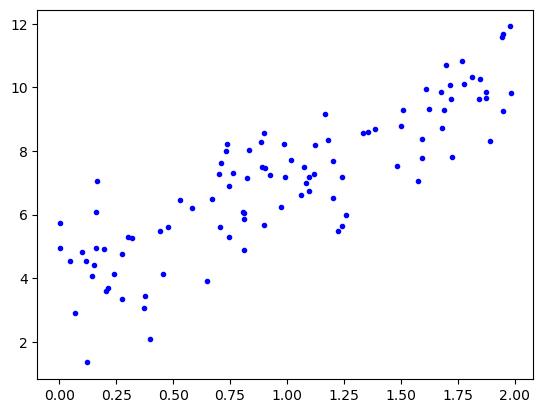

In [3]:
plt.plot(X, y, "b.")
plt.show()

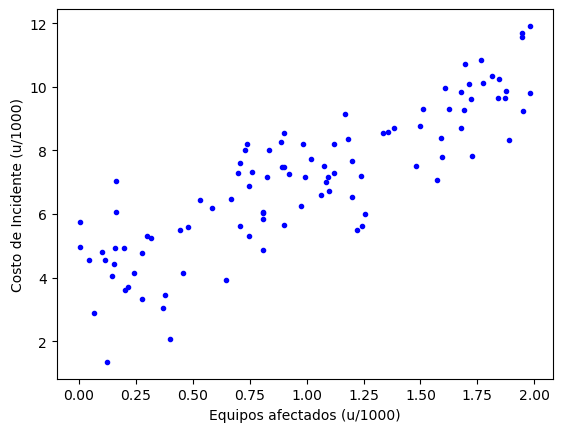

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo de Incidente (u/1000)")
plt.show()

# 3.- Modificacion deL DataSet

In [5]:
import pandas as pd

In [6]:
data = {'Numeros de equipos afectados': X.flatten(),'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Numeros de equipos afectados,Costo
0,0.975650,6.237712
1,1.846488,10.249363
2,0.376456,3.452873
3,1.335363,8.559723
4,0.762424,7.316513
5,0.707221,5.618122
6,0.738072,8.205297
7,1.200668,6.522531
8,0.443127,5.496436
9,1.678851,8.710834


In [7]:
# Escalado de numero de equipos afectados
df['Numeros de equipos afectados'] = df['Numeros de equipos afectados'] * 1000
df['Numeros de equipos afectados'] = df['Numeros de equipos afectados'].astype('int')

#Esacalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,Numeros de equipos afectados,Costo
0,975,62377
1,1846,102493
2,376,34528
3,1335,85597
4,762,73165
5,707,56181
6,738,82052
7,1200,65225
8,443,54964
9,1678,87108


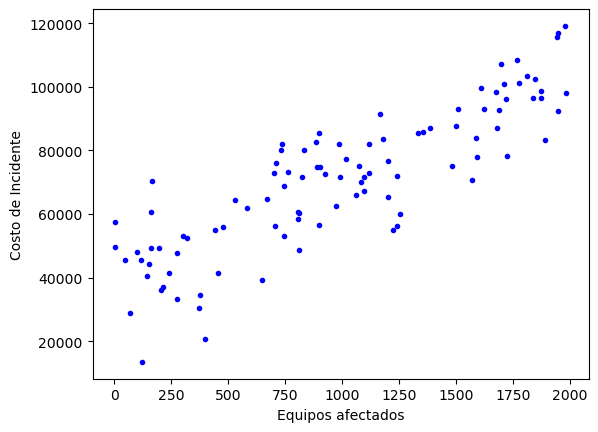

In [8]:
plt.plot(df['Numeros de equipos afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo de Incidente")
plt.show()

# 4.- Construccion de modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la funcion de hipotesis

lin_reg = LinearRegression()
lin_reg.fit(df['Numeros de equipos afectados'].values.reshape(-1, 1), df['Costo'].values )

LinearRegression()

In [11]:
# Parametro Teth 0
lin_reg.intercept_

38483.672414035

In [12]:
# Parametro tetha 1
lin_reg.coef_

array([32.511904])

In [13]:
# Pridiccion para el valor minimo y maxomo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df['Numeros de equipos afectados'].min()],[df['Numeros de equipos afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

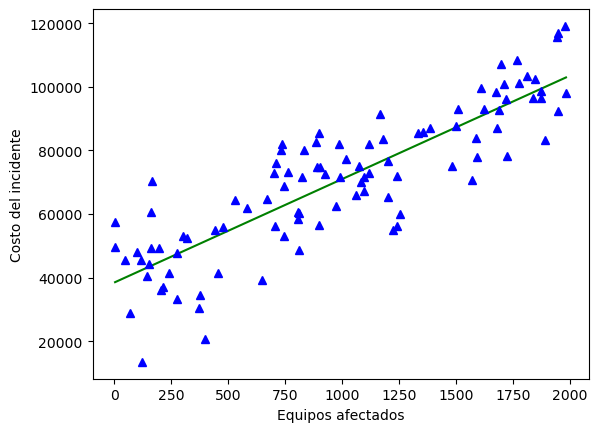

In [14]:
#Representacion grafica de la funcion de hipotesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['Numeros de equipos afectados'], df['Costo'], "b^" )
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos

In [20]:
x_new = np.array([[2700]]) # Numero de equipos afectados.
#prediccion del costo que tendria el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 126265


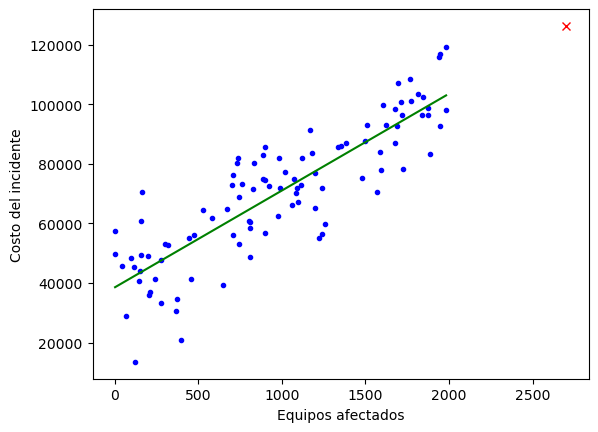

In [21]:
plt.plot(df['Numeros de equipos afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()